<a href="https://colab.research.google.com/github/seonghunlee94/AI_study/blob/master/1%EC%A3%BC%EC%B0%A8_%EA%B8%B0%EB%B3%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [기본과제] MNIST 분류(classification) 모델 구현


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 472kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.53MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.5MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## 1. Test data 준비하기

### 1-1 testset 생성


In [3]:
## [MYCODE] testset
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

60000
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([1, 28, 28]) 5


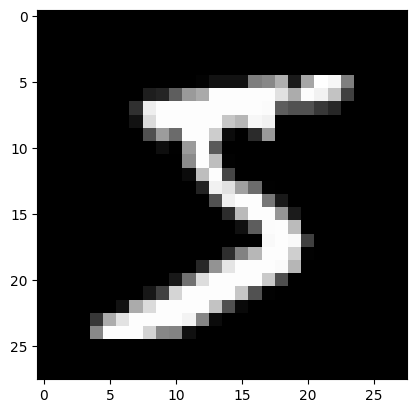

In [16]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset.classes)
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [17]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)



### 1-2 testloader 생성


In [6]:
## [MYCODE] testloader
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


## 2. nn.CrossEntropyLoss 적용하기

### 2-1 모델 출력 부분 10개로 변경하기


In [18]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10) ## [MYCODE] output 10으로 조절

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


model = Model(28 * 28 * 1, 1024)

In [9]:
model.parameters()

<generator object Module.parameters at 0x7ef8d5c0aab0>

In [ ]:
for param in model.parameters():
  print(param.shape)

### 2-2 CrossEntropyLoss 함수 호출


In [19]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

criterion = nn.CrossEntropyLoss() ## [MYCODE] CrossEntropyLoss
optimizer = SGD(model.parameters(), lr=lr, momentum=0.9)

In [20]:
train_accs = []
test_accs = []

In [12]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

In [24]:
import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

### 2-3 CrossEntropyLoss 적용하기

In [22]:
n_epochs = 100

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    #print(preds.shape, labels.shape)
    #break
    loss = criterion(preds, labels) ## [MYCODE] criterion
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  # print(f"Epoch {epoch:3d} | Loss: {total_loss}")
  # 직접 작성
  train_acc = accuracy(model, trainloader)
  test_acc = accuracy(model, testloader)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

  print(f"Epoch {epoch:3d} | Loss: {total_loss} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

Epoch   0 | Loss: 1644.5481013059616 | Train Acc: 0.7618 | Test Acc: 0.7656
Epoch   1 | Loss: 736.819901227951 | Train Acc: 0.8071 | Test Acc: 0.8072
Epoch   2 | Loss: 565.3857050836086 | Train Acc: 0.8199 | Test Acc: 0.8212
Epoch   3 | Loss: 511.9920291900635 | Train Acc: 0.8260 | Test Acc: 0.8272
Epoch   4 | Loss: 482.94342425465584 | Train Acc: 0.8319 | Test Acc: 0.8340
Epoch   5 | Loss: 462.20756214112043 | Train Acc: 0.8378 | Test Acc: 0.8357
Epoch   6 | Loss: 445.2498604655266 | Train Acc: 0.8423 | Test Acc: 0.8397
Epoch   7 | Loss: 430.0141079723835 | Train Acc: 0.8454 | Test Acc: 0.8430
Epoch   8 | Loss: 416.64188002049923 | Train Acc: 0.8499 | Test Acc: 0.8463
Epoch   9 | Loss: 404.3749513924122 | Train Acc: 0.8528 | Test Acc: 0.8486
Epoch  10 | Loss: 393.3516363799572 | Train Acc: 0.8563 | Test Acc: 0.8502
Epoch  11 | Loss: 383.2502253949642 | Train Acc: 0.8577 | Test Acc: 0.8524
Epoch  12 | Loss: 374.61795400083065 | Train Acc: 0.8600 | Test Acc: 0.8544
Epoch  13 | Loss: 365

In [11]:
idx = 0

x = trainset[idx][0][None]  # (1, 1, 28, 28)
x = x.to('cuda')

print(model(x))
print(trainset[idx][1])

tensor([[4.9591]], device='cuda:0', grad_fn=<ReluBackward0>)
5


## 3. 정확도 plot

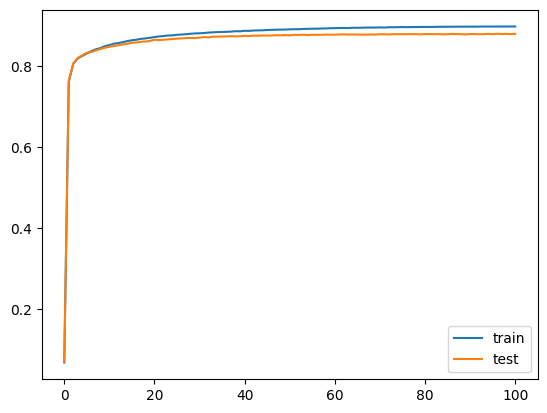

In [25]:
plot_acc(train_accs, test_accs);